# Feature Analysis

In [1]:
import pandas as pd
import math

In [2]:
filenames1 = ['pionminus','pionminus1','pionminus2','pionminus3','pionminus4','pionminus5']
filenames1 = ['piminus_new00']
filenames1 = ['electron_new0']
filepath = "/home/yoren/bnl/PHENIX/ee/ML/"

hadron_weight = 25000*50/500

In [ ]:
if True:
    data = pd.read_csv(filepath+f'{filenames1[0]}.csv')
    for ifile in range(1,len(filenames1)):
        idata = pd.read_csv(filepath+f'{filenames1[ifile]}.csv')
        data = pd.concat([data,idata], sort=False)

    data = data.sample(frac = 1)
    float_columns=('Pt', 'Phi0', 'The0', 'PhiDC', 'ZDC', 'Alpha', 'Ecore',\
                   'reconpt','reconphi0','reconthe0','px','py','pz','vx','vy','vz',\
                   'sdphi0','sdthe0','SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0',\
                   'sdphi1','sdthe1','SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1',\
                   'sdphi2','sdthe2','SecondHitPhiR2','SecondHitPhiL2','SecondHitTheR2','SecondHitTheL2',\
                   'sdphi3','sdthe3','SecondHitPhiR3','SecondHitPhiL3','SecondHitTheR3','SecondHitTheL3')
    int_columns=('NBDThit','Centrality', 'Charge', 'Arm','IsTrue0','IsTrue1','IsTrue2','IsTrue3')
    
    for float_column in float_columns:
        data[float_column] = data[float_column].astype('float16')
    for int_column in int_columns:
        data[int_column] = data[int_column].astype('int32')
    data.head()
    
    data = data[(data['Pt'] > 1.0) & (data['Pt'] < 25) & (data['Ecore'] > 0.1) & (data['Ecore'] < 25) & (data['reconthe0'] < 25) & (data['reconthe0'] > -25) ]
    data['px'] = data['px'] *data['px'] 
    data['py'] = data['py'] *data['py'] 
    data['px'] =  data['px']+data['py']
    data['px'] = data['px']**0.5
    data['Alpha'] = 1./data['Alpha']
    data.dropna()
    
    
    data.head()

In [ ]:
data.head()

NBDThit        Pt      Phi0      The0     PhiDC        ZDC  \
3795271        1  1.055664  0.308838  1.605469  0.116699  -7.722656   
707101         3  1.230469  2.960938  1.245117  2.789062  74.125000   
3228603        3  1.446289  3.644531  1.417969  3.503906  33.843750   
723646         3  1.438477  0.805664  1.602539  0.664551  -7.015625   
857246         3  1.347656  0.631348  1.600586  0.480957  -6.515625   

             Alpha     Ecore  Centrality  Charge  ...  SecondHitPhiL2  \
3795271  10.507812  1.055664          72      -1  ...      -99.000000   
707101   11.062500  1.230469          45      -1  ...        0.032776   
3228603  13.898438  1.372070          77      -1  ...      -99.000000   
723646   14.445312  1.360352          32      -1  ...      -99.000000   
857246   13.476562  1.365234          42      -1  ...       13.976562   

         SecondHitTheR2  SecondHitTheL2     sdphi3     sdthe3  IsTrue3  \
3795271      -99.000000      -99.000000   0.188599  -0.315186      251   
707101        -1.409180       -3.333984 -10.000000 -10.000000      464   
3228603      -99.000000      -99.000000  -0.572266   0.233887       48   
723646        -5.964844      -99.000000   0.002625  -0.238159       25   
857246         7.242188        6.347656 -10.000000 -10.000000       36   

         SecondHitPhiR3  SecondHitPhiL3  SecondHitTheR3  SecondHitTheL3  
3795271      -99.000000      -99.000000      -99.000000      -99.000000  
707101       -99.000000        8.031250      -99.000000      -10.078125  
3228603      -99.000000      -99.000000      -99.000000      -99.000000  
723646        -7.054688      -99.000000       -0.001989      -99.000000  
857246       -99.000000       29.609375      -99.000000       12.875000  

[5 rows x 48 columns]

In [ ]:
print(data.size, data.shape)

30971280 (645235, 48)


In [ ]:
# удалим лишние колонки
data = data.drop(columns = ['py','pz','vx','vy','vz'])
data = data.drop(columns = ['SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0'])
data = data.drop(columns = ['SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1'])
data = data.drop(columns = ['SecondHitPhiR2','SecondHitPhiL2','SecondHitTheR2','SecondHitTheL2'])
data = data.drop(columns = ['SecondHitPhiR3','SecondHitPhiL3','SecondHitTheR3','SecondHitTheL3'])
#data = data.drop(columns = ['NBDThit','Centrality', 'Charge', 'Arm','IsTrue0','IsTrue1','IsTrue2','IsTrue3'])
#data = data.drop(columns = ['reconthe0'])

In [ ]:
import matplotlib.pyplot as plt

def analysis(data: pd.DataFrame):
    fig, ax = plt.subplots(4, 3, figsize=(15, 6))
    for i, feature in enumerate(['px', 'Pt', 'Phi0', 'The0', 'PhiDC', 'ZDC', 'Alpha', 'Ecore' , 'sdphi0', 'sdphi1', 'sdphi2', 'sdphi3']):
        x, y = divmod(i, 3)
        data[feature].plot.hist(ax=ax[x][y], ylabel='', title=feature, color='skyblue', logy=True)


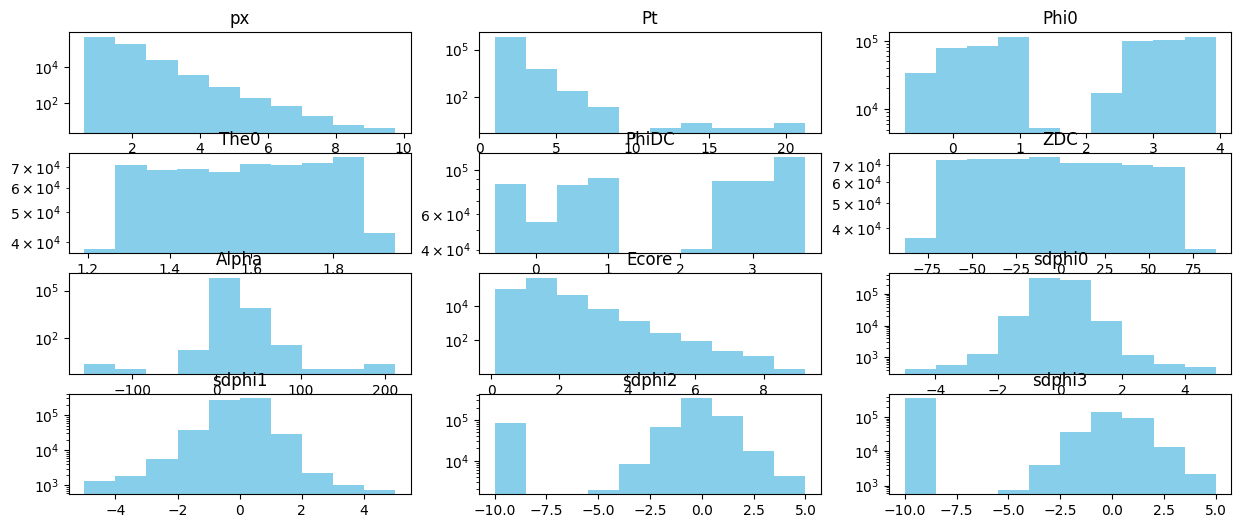

In [ ]:
analysis(data)

+ Видим, что impressions имеют только одно значение, поэтому их можно удалить.
+ Таргет-переменная clicks сильно несбалансирована. Возможно, стоит использовать балансировку весов, а также в качестве оценки моделей использовать f1 и ROC AUC.
+ У campaign_clicks нулевых значений сильно больше, чем ненулевых, следовательно, можно трансформировать в бинарную фичу
+ os_id со значениями больше 6 встречается редко, можно объединить в одну категорию
+ Аналогично с редкими значениями zone_id

# Feature Engineering

In [ ]:
def feature_engineering(data: pd.DataFrame) -> pd.DataFrame:
    # делим выборку на train и test
    #data = data.sort_values(by='date_time', ignore_index=True)
    #cut_off_val = data[data['date_time'] < pd.to_datetime('2021-10-01')].index[-1]
    #cut_off_test = data[data['date_time'] < pd.to_datetime('2021-10-02')].index[-1]

    cut_off_val =  int (data.shape[0]/3)
    cut_off_test = int (data.shape[0]/3*2 + 1)

    print(cut_off_val,cut_off_test)

    y = data['px']
    data = data.drop(columns = ['px'])
    data_train, data_test = data[:cut_off_test], data[cut_off_test:]
    y_train, y_test = y.iloc[:cut_off_test], y.iloc[cut_off_test:]
    
    # делаем one hot encodings
    #enc = OneHotEncoder(drop='first', handle_unknown='ignore')
    #enc.fit(data_train)
    #transformed_train = enc.transform(data_train)
    #transformed_test = enc.transform(data_test)
    
    return data_train, data_test, y_train, y_test,cut_off_val

In [ ]:
X_train_all, X_test, y_train_all, y_test, cut_off_val = feature_engineering(data)

215078 430157


In [ ]:
X_test

NBDThit        Pt      Phi0      The0     PhiDC        ZDC  \
3551609        7  1.005859  0.504395  1.577148  0.302002  -1.287109   
4604641        3  1.556641 -0.368164  1.707031 -0.499268 -30.078125   
4078447        3  1.073242  3.832031  1.463867  3.642578  23.468750   
1550253        3  1.030273  3.689453  1.624023  3.492188 -11.703125   
1115730        3  1.232422  3.283203  1.749023  3.115234 -39.437500   
...          ...       ...       ...       ...       ...        ...   
4782411        3  1.222656  3.492188  1.878906  3.316406 -69.625000   
4106275        1  1.333008  1.070312  1.865234  0.912109 -66.687500   
4982357        3  1.438477  3.037109  1.364258  2.896484  46.156250   
1807739        3  1.137695 -0.121826  1.355469 -0.305664  47.812500   
1332407        3  1.417969  3.029297  1.408203  2.886719  36.125000   

             Alpha     Ecore  Centrality  Charge  ...  IsTrue0    sdphi1  \
3551609   9.984375  1.353516          14      -1  ...     1000 -0.476074   
4604641  14.976562  1.540039          24      -1  ...     1000  1.144531   
4078447  10.312500  0.995117          65      -1  ...     1000  0.343018   
1550253  10.085938  0.909668          51      -1  ...     1000 -0.162842   
1115730  11.656250  1.155273          44      -1  ...     1000  0.796387   
...            ...       ...         ...     ...  ...      ...       ...   
4782411  10.750000  1.224609          41      -1  ...     1000 -0.493164   
4106275  12.242188  1.322266          48      -1  ...     1000 -0.483398   
4982357  13.804688  1.276367          79      -1  ...     1000  0.663086   
1807739  10.546875  1.166016          58      -1  ...     1000  0.127441   
1332407  13.828125  1.326172          19      -1  ...     1000  0.377930   

           sdthe1  IsTrue1     sdphi2     sdthe2  IsTrue2     sdphi3  \
3551609 -0.138062     1000  -0.781738   0.154297      388  -0.551270   
4604641  0.849609     1000  -1.310547   0.747559      112 -10.000000   
4078447  0.838379     1000  -0.611816   0.222534      209   0.585938   
1550253  0.679688     1000  -0.612793   0.182739      624   1.678711   
1115730  0.771973     1000   1.253906  -1.308594       75 -10.000000   
...           ...      ...        ...        ...      ...        ...   
4782411  0.510742     1000  -0.058594   0.335938      930   1.720703   
4106275 -0.042755     1000 -10.000000 -10.000000       48   0.452881   
4982357  0.427979     1000   1.941406   0.811523       46 -10.000000   
1807739 -0.538086     1000  -1.276367   2.333984       43 -10.000000   
1332407  0.194580       10   1.505859   1.657227      322 -10.000000   

            sdthe3  IsTrue3  
3551609  -1.337891       36  
4604641 -10.000000      130  
4078447   0.354492      112  
1550253  -0.164673      108  
1115730 -10.000000      367  
...            ...      ...  
4782411   1.362305      281  
4106275  -0.516602      166  
4982357 -10.000000      293  
1807739 -10.000000      116  
1332407 -10.000000       19  

[215078 rows x 26 columns]

In [ ]:
X_train, X_val = X_train_all[:cut_off_val], X_train_all[cut_off_val:]
y_train, y_val = y_train_all[:cut_off_val], y_train_all[cut_off_val:]

+ Увидели, что количество кликов меняется в зависимости от дня недели и часа, добавим в качестве фичей
+ Также, добавим интеракции между этими двумя переменными, так как в разные дни недели разные часы могут по-разному влиять на колличество кликов
+ banner_id удалила, так как предполагаю, что модель должна уметь предсказывать клики для новых баннеров тоже.
+ Так как все оставшиеся фичи являются категориальными, сделали one-hot-encoding


+ В качестве теста берем последний день датасета, в качестве валидации -- предпоследний

# Create Model

In [ ]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
gb_clf = GradientBoostingRegressor(n_estimators=20, learning_rate= 0.1, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train)

predicted = gb_clf.predict(X_test)

# calculating the main quality metrics
#print(metrics.classification_report(y_test, predicted))

#print('confusion matrix')
#print(metrics.confusion_matrix(y_test, predicted))

In [ ]:
# search for parameters
# https://www.kaggle.com/hatone/gradientboostingclassifier-with-gridsearchcv
import time
from sklearn.model_selection import GridSearchCV

start = time.time() 

parameters = {
    "loss":['squared_error'],
    "learning_rate": [0.2],
    "min_samples_split": [0.01],
    "max_depth":[50],
    "max_features":["log2","sqrt"],
    "criterion": ['squared_error'],
    "n_estimators":[200]
    }

classif = GradientBoostingRegressor()
classif.set_params(init='zero')

clf = GridSearchCV(classif, parameters, cv=3, n_jobs=8)

clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(init='zero'), n_jobs=8,
             param_grid={'criterion': ['squared_error'], 'learning_rate': [0.2],
                         'loss': ['squared_error'], 'max_depth': [50],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_split': [0.01], 'n_estimators': [200]})

In [ ]:

print('точность: ', clf.score(X_test, y_test))

# getting the best parameters ans score
print(clf.best_params_)
print(clf.best_score_)

stop = time.time()    
print('time of execution (sec)', stop - start)

точность:  0.914214051027204
{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'squared_error', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 0.01, 'n_estimators': 200}
0.9119231802898119
time of execution (sec) 723.4845449924469


# Cross Validation

In [ ]:
predicted = clf.predict(X_test)
print(metrics.r2_score(y_test, predicted))

0.914214051027204


In [ ]:
y_pred = clf.predict(X_test)

# Model Evaluation

In [ ]:
kek_data = data
kek_data = kek_data.drop(columns = ['px'])
proba_loc = clf.predict(kek_data)
print(proba_loc[0])

1.0685737971895222


In [ ]:
import ROOT as root
outfile = root.TFile.Open("output/BDT_pt.root", "recreate")
pt_hist_AI = root.TH3D("pt_hist_AI", "pt_hist_AI", 100, -1, 1, 100, 0, 10, 10, 0, 100)
pt_hist_DC = root.TH3D("pt_hist_DC", "pt_hist_DC", 100, -1, 1, 100, 0, 10, 10, 0, 100)
pt_hist_DF = root.TH3D("pt_hist_DF", "pt_hist_DF", 100, -1, 1, 100, 0, 10, 10, 0, 100)

Welcome to JupyROOT 6.30/06


In [ ]:
mycute,mycuth, AIcute, AIcuth = 0, 0, 0, 0
norm_e, norm_h = 0, 0
data0 = data.reset_index()  # make sure indexes pair with number of rows

sigma = 3

counter =-1
for index, row in data0.iterrows():
    counter+=1
    if counter>25000000: break
    centrality, pt, px = row['Centrality'], row['Pt'], row['px']

    if pt<0.4 or centrality<0: continue

    pt_hist_AI.Fill(proba_loc[counter]-px,px,centrality)
    pt_hist_DC.Fill(pt-px,px,centrality)
    pt_hist_DF.Fill(proba_loc[counter]-pt,px,centrality)

In [ ]:
pt_hist_AI.Write()
pt_hist_DC.Write()
pt_hist_DF.Write()
outfile.Close()

In [ ]:
%run input/Format.ipynb

/home/yoren/.local/lib/python3.10/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


In [ ]:
import pickle
with open('output/bdt_pt.pkl','wb') as f:
    pickle.dump(clf,f)

print(clf.predict(kek_data[0:10]))

[1.0685738  1.294411   1.45808004 1.44215962 1.33894771 1.0047823
 1.0740117  1.33374194 1.16133149 2.12354673]


In [ ]:
c1 = root.TCanvas("c1","c1",1400,2500)
c1.Divide(2,5)
part_names_legend= [ "e^{-} " , "#pi^{-} "]
centralities_legend = ["0-20%","20-40%","40-60%","60-80%","80-93%"]
legends = []
for icentr in range(5):

    c1.cd(1+2*icentr)
    root.gPad.SetLogy()
    e_pt_hist_NC.ProjectionX(f"e_pt_hist_NC_{icentr}").SetLineWidth(3)
    e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}").SetLineWidth(3)
    e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}").SetLineWidth(3)
    e_pt_hist_NC.SetLineColor(4)
    e_pt_hist_SC.SetLineColor(2)
    e_pt_hist_AI.SetLineColor(1)
    proj = e_pt_hist_NC.ProjectionX(f"e_pt_hist_NC_{icentr}",icentr+1,icentr+1)
    proj.SetMinimum(100)
    Format_Hist_total(proj, title_x="p_{T} [GeV]",  title_y="dN/dp_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    proj.Draw()
    e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}",icentr+1,icentr+1).Draw("same")
    e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}",icentr+1,icentr+1).Draw("same")

    legends.append(Draw_Legend_Title(0.6,0.6,0.9,0.9,part_names_legend[0]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].Draw()

    c1.cd(2+2*icentr)
    root.gPad.SetLogy()
    h_pt_hist_NC.ProjectionX(f"h_pt_hist_NC_{icentr}").SetLineWidth(3)
    h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}").SetLineWidth(3)
    h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}").SetLineWidth(3)
    h_pt_hist_NC.SetLineColor(4)
    h_pt_hist_SC.SetLineColor(2)
    h_pt_hist_AI.SetLineColor(1)
    projh = e_pt_hist_NC.ProjectionX(f"h_pt_hist_NC_{icentr}",icentr+1,icentr+1)
    projh.SetMinimum(100)
    Format_Hist_total(projh, title_x="p_{T} [GeV]",  title_y="dN/dp_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    projh.SetMinimum(2)
    projh.Draw()
    h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}",icentr+1,icentr+1).Draw("same")
    h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}",icentr+1,icentr+1).Draw("same")

    legends.append(Draw_Legend_Title(0.6,0.6,0.9,0.9,part_names_legend[1]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].Draw()
c1.Draw()

NameError: name 'e_pt_hist_NC' is not defined

In [ ]:
import pickle
# load
with open('output/bdt_pt.pkl', 'rb') as f:
    clf2 = pickle.load(f)
print(clf2.predict(kek_data[0:10]))

[1.0685738  1.294411   1.45808004 1.44215962 1.33894771 1.0047823
 1.0740117  1.33374194 1.16133149 2.12354673]


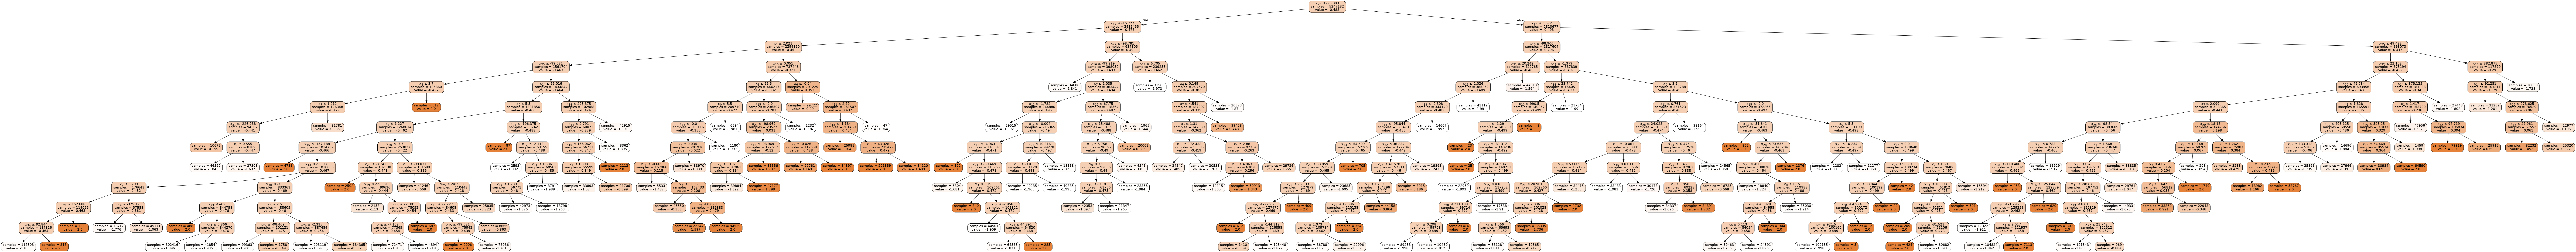

In [ ]:
sub_tree_42 = clf2.best_estimator_[0, 0]
from sklearn.tree import export_graphviz, export_text
from sklearn.tree import _tree
# Visualization
# Install graphviz: https://www.graphviz.org/download/
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)

graph = graph_from_dot_data(dot_data)
png = graph.create_png()
# Save (optional)
from pathlib import Path
Path('output/out.png').write_bytes(png)
# Display
Image(png)

In [ ]:
clf2.predict(kek_data[0:100])

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int32)

In [ ]:
clf2.predict_proba(kek_data[0:100])

array([[0.63332213, 0.36667787],
       [0.90246723, 0.09753277],
       [0.16846238, 0.83153762],
       [0.04481149, 0.95518851],
       [0.967654  , 0.032346  ],
       [0.78582759, 0.21417241],
       [0.96855533, 0.03144467],
       [0.03738829, 0.96261171],
       [0.85899253, 0.14100747],
       [0.07672582, 0.92327418],
       [0.94052226, 0.05947774],
       [0.96925715, 0.03074285],
       [0.9255942 , 0.0744058 ],
       [0.95790885, 0.04209115],
       [0.17484507, 0.82515493],
       [0.90801663, 0.09198337],
       [0.97470102, 0.02529898],
       [0.96998563, 0.03001437],
       [0.96542442, 0.03457558],
       [0.68789436, 0.31210564],
       [0.06647542, 0.93352458],
       [0.02590778, 0.97409222],
       [0.89165648, 0.10834352],
       [0.10126162, 0.89873838],
       [0.97013195, 0.02986805],
       [0.99053435, 0.00946565],
       [0.28980569, 0.71019431],
       [0.69065463, 0.30934537],
       [0.95689794, 0.04310206],
       [0.06436092, 0.93563908],
       [0.

In [ ]:
print( clf2.best_params_)

{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 12, 'max_features': 'log2', 'min_samples_split': 0.01, 'n_estimators': 20}


In [ ]:
clf2.best_estimator_.predict_proba(kek_data[9:20])

array([[0.07672582, 0.92327418],
       [0.94052226, 0.05947774],
       [0.96925715, 0.03074285],
       [0.9255942 , 0.0744058 ],
       [0.95790885, 0.04209115],
       [0.17484507, 0.82515493],
       [0.90801663, 0.09198337],
       [0.97470102, 0.02529898],
       [0.96998563, 0.03001437],
       [0.96542442, 0.03457558],
       [0.68789436, 0.31210564]])

In [ ]:
y = clf2.best_estimator_[0, 0].predict(kek_data[9:19].values.tolist())*0
#y = gb_clf.decision_function(kek_data[9:20])

rate = clf2.best_params_['learning_rate']
print(rate)
for i in range(0,10):
    sub_tree = clf2.best_estimator_[i, 0]
    y += rate*sub_tree.predict(kek_data[9:19].values.tolist())
print(y)
print(gb_clf.decision_function(kek_data[9:20]))
z=y
for i in range(len(z)): 
    z[i] = 1./(1+np.exp(-z[i]))
print(z)

0.2
[ 1.94127665 -2.35907336 -2.36641299 -1.76645893 -2.3498593   0.48130882
 -1.21224177 -2.3937125  -2.45371886 -2.35907336]
[-3.69741832 -3.20457348 -4.43349033 -3.12136151 -3.39189598 -3.78777519
 -3.09513097 -3.81029894 -4.23134002 -3.26306616 -2.83861437]
[0.87449233 0.08634727 0.08576999 0.14598325 0.08707696 0.61805689
 0.22930464 0.08365341 0.07916702 0.08634727]


In [ ]:
best_gbc = clf2.best_estimator_

In [ ]:
n_estim = best_gbc.n_estimators

In [ ]:
learning_rate = best_gbc.learning_rate
print(clf2.decision_function(kek_data[9:19]))
arr = clf2.decision_function(kek_data[9:19])
print(1./(1.+np.exp(-arr)))
#tree_scores = [best_gbc.estimators_[i, 0].decision_function(kek_data[9:19].values.tolist()) for i in range(10)]
print(learning_rate)

[ 2.48768796 -2.76083312 -3.45087239 -2.520902   -3.12491509  1.55167093
 -2.28965489 -3.65136666 -3.47560485 -3.32942029]
[0.92327418 0.05947774 0.03074285 0.0744058  0.04209115 0.82515493
 0.09198337 0.02529898 0.03001437 0.03457558]
0.2


In [ ]:
log_odds_predictions = []
for tree in clf2.best_estimator_:
    # For each tree, get the predicted values for each sample
    leaf_indices = tree[0].apply(kek_data[9:19].values.tolist())  # Get the leaf indices for the training data
    leaf_values = tree[0].tree_.value  # Get the values at each leaf

    # Average the values for each leaf to interpret them as log odds
    predicted_log_odds = [leaf_values[leaf_indices[i]].mean() for i in range(len(kek_data[9:19]))]
    log_odds_predictions.append(predicted_log_odds)

In [ ]:
print(log_odds_predictions)

[[-1.200624512099922, -1.8972357767003818, -1.9895663205743614, -1.6814882493274452, -1.8959555879763763, -0.34568836462673375, -1.8551203846226936, -1.9345894979262641, -1.9106729177434207, -1.8972357767003818], [-0.9171851259767482, -1.5823254008503425, -1.587503998644066, -1.542846112360411, -1.587503998644066, -0.8388272699490528, -1.5823254008503425, -1.587503998644066, -1.578659801324435, -1.5823254008503425], [1.826983590463873, -1.342027522547931, -1.3798789331792816, -1.3693805745914267, -1.3310208634481397, 1.826983590463873, -1.3291769712940058, -1.3985833963429382, -1.376432121760617, -1.342027522547931], [0.2056563634540976, -1.215986289370081, -1.280018789147165, -1.252056182527864, -1.2261853528178022, 0.0481771596605836, -1.2110563970128718, -1.2419598891099737, -1.3193633222306484, -1.215986289370081], [1.8680051722267956, -1.1633336642755425, -1.1183188238434474, -0.5345410942307353, -1.1520258824134673, 1.8680051722267956, -0.9635131780834657, -1.1633336642755425, -1

In [ ]:
rate = clf2.best_params_['learning_rate']
myarr = [log_odds_predictions[i][0] for i in range(10)]
print(rate,rate*sum(myarr))
print(clf2.decision_function(kek_data[9:19]))

0.2 1.9412766546472733
[ 2.48768796 -2.76083312 -3.45087239 -2.520902   -3.12491509  1.55167093
 -2.28965489 -3.65136666 -3.47560485 -3.32942029]


In [ ]:
print(best_gbc.estimators_.shape[0])
print(best_gbc.estimators_.shape[1])
y = []
for i in range(10):
    y0=[]
    for j in range(n_estim):
        sub_tree = clf2.best_estimator_[j, 0]
        y0.append(sub_tree.predict(kek_data[9+i:10+i].values.tolist())[0])
    y.append(y0)
print(y)

20
1
[[-1.200624512099922, -0.9171851259767482, 1.826983590463873, 0.2056563634540976, 1.8680051722267956, 1.6829132038178136, 1.3978147757965822, 1.3103207102666945, 1.6467431067430889, 1.88575598854409, 1.1536355145443369, 0.8152277437942979, 0.5149847061741806, 0.2617318927990144, 0.9355408312636289, -0.3265557729248271, -0.12416538134348659, 0.7468589834332378, -0.9184963061898156, -0.32670569801241695], [-1.8972357767003818, -1.5823254008503425, -1.342027522547931, -1.215986289370081, -1.1633336642755425, -1.0756564849721666, -1.0074518401169066, -0.9259988852057675, -0.8587809061735233, -0.7265700209338551, -0.7530025649335593, -0.5900907361753928, -0.6051274394850223, -0.6329447146296465, 1.5253392697599892, -0.5001264035722037, -0.44779986646729886, -0.3771992017635802, -0.19504832427241817, 0.567201188755075], [-1.9895663205743614, -1.587503998644066, -1.3798789331792816, -1.280018789147165, -1.1183188238434474, -1.0586109465745617, -0.9367492494761868, -0.8649203507747674, -0

In [ ]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 5)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 5)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if ( "
        
        for p in path[:-1]:
            if rule != "if ( ":
                rule += " && "
            rule += str(p)
        rule += " ) "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [ ]:
import numpy as np
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 5)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 5)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if  "
        
        for p in path[:-1]:
            if rule != "if  ":
                rule += " if "
            rule += str(p)
        rule += "  "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [ ]:
column_headers = list(kek_data.columns.values)
print(column_headers)
print(len(column_headers))

['NBDThit', 'Pt', 'Phi0', 'The0', 'PhiDC', 'ZDC', 'Alpha', 'Ecore', 'Centrality', 'Charge', 'Arm', 'sdphi0', 'sdthe0', 'SecondHitPhiR0', 'SecondHitPhiL0', 'SecondHitTheR0', 'SecondHitTheL0', 'sdphi1', 'sdthe1', 'SecondHitPhiR1', 'SecondHitPhiL1', 'SecondHitTheR1', 'SecondHitTheL1', 'sdphi2', 'sdthe2', 'SecondHitPhiR2', 'SecondHitPhiL2', 'SecondHitTheR2', 'SecondHitTheL2', 'sdphi3', 'sdthe3', 'SecondHitPhiR3', 'SecondHitPhiL3', 'SecondHitTheR3', 'SecondHitTheL3']
35


In [ ]:
#print(f"double mytree{list(kek_data.columns)}")
print('{')
for iestim in range(n_estim):
    print(f"    if (iestim == {iestim})")
    print('    {')
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(kek_data.columns), None)
    for r in rules:
        print("       ",r)
    print('    }')
print ('    return -9999;')
print('};')

{
    if (iestim == 0)
    {
        if  (x[22] <= -25.88281) if (x[19] <= -16.72656) if (x[1] <= 2.02051) if (x[25] > -99.03125) if (x[14] <= 55.01562) if (x[0] <= 5.5) if (x[1] <= 1.22705) if (x[15] > -157.1875) if (x[13] > -99.03125) if (x[30] <= -7.5) if (x[23] > -4.90039) if (x[11] <= 0.86597)   return -1.8959555879763763;  // | based on 302,416 samples
        if  (x[22] <= -25.88281) if (x[19] <= -16.72656) if (x[1] <= 2.02051) if (x[25] > -99.03125) if (x[14] <= 55.01562) if (x[0] <= 5.5) if (x[1] <= 1.22705) if (x[15] > -157.1875) if (x[13] > -99.03125) if (x[30] > -7.5) if (x[0] > 2.5) if (x[24] <= -2.33496)   return -1.8972357767003818;  // | based on 203,119 samples
        if  (x[22] <= -25.88281) if (x[19] <= -16.72656) if (x[1] > 2.02051) if (x[15] > 0.05089) if (x[6] > -0.04008) if (x[11] <= 2.79004) if (x[18] > -1.18408) if (x[13] <= 43.32812)   return 2.0;  // | based on 201,359 samples
        if  (x[22] <= -25.88281) if (x[19] <= -16.72656) if (x[1] <= 2.02051) if (

In [ ]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 5)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 5)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " : "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f"  # | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [ ]:
print(f"def mytree( iestim,  x ) :")
for iestim in range(n_estim):
    print(f"    if iestim == {iestim}:")
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(kek_data.columns), None)
    for r in rules:
        print("       ",r)
print ('    return -9999')

def mytree( iestim,  x ) :
    if iestim == 0:
        if (x[22] <= -25.88281) and (x[19] <= -16.72656) and (x[1] <= 2.02051) and (x[25] > -99.03125) and (x[14] <= 55.01562) and (x[0] <= 5.5) and (x[1] <= 1.22705) and (x[15] > -157.1875) and (x[13] > -99.03125) and (x[30] <= -7.5) and (x[23] > -4.90039) and (x[11] <= 0.86597) :  return -1.8959555879763763  # | based on 302,416 samples
        if (x[22] <= -25.88281) and (x[19] <= -16.72656) and (x[1] <= 2.02051) and (x[25] > -99.03125) and (x[14] <= 55.01562) and (x[0] <= 5.5) and (x[1] <= 1.22705) and (x[15] > -157.1875) and (x[13] > -99.03125) and (x[30] > -7.5) and (x[0] > 2.5) and (x[24] <= -2.33496) :  return -1.8972357767003818  # | based on 203,119 samples
        if (x[22] <= -25.88281) and (x[19] <= -16.72656) and (x[1] > 2.02051) and (x[15] > 0.05089) and (x[6] > -0.04008) and (x[11] <= 2.79004) and (x[18] > -1.18408) and (x[13] <= 43.32812) :  return 2.0  # | based on 201,359 samples
        if (x[22] <= -25.88281) and (x[19

In [ ]:
def mytree(x,y):
    return 0

In [ ]:
def mygradboost (x, lerning_rate = 0.2):
    prob = 0
    for i in range (n_estim):
        prob+=lerning_rate*mytree(i, x)
    return 1. / ( 1. + np.exp( - prob ) )


In [ ]:
def mybdt(x, prob):
    if mygradboost(x)>prob: return 1
    return  

In [ ]:
iestim = 9
sub_tree = clf2.best_estimator_[iestim, 0]
y = sub_tree.predict(kek_data[9:19].values.tolist())
print(y)

myf = [mytree(iestim, kek_data[9+i:10+i].values.tolist()[0]) for i in range(10)]
print(myf)

[ 1.88575599 -0.72657002 -0.76234702  0.18790994 -0.93098879 -0.66466124
  4.73576223 -0.80251329 -0.88380734 -0.72657002]
[1.8857559885440898, -0.7265700209338551, -0.7623470226329747, 0.1879099445346337, -0.9309887901848545, -0.6646612392445693, 4.735762228993647, -0.8025132900800463, -0.8838073380277853, -0.7265700209338551]


In [ ]:
iestim = 9
sub_tree = clf2.best_estimator_
y = sub_tree.predict_proba(kek_data[9:19].values.tolist())
print(y)

myf = [mygradboost(kek_data[9+i:10+i].values.tolist()[0]) for i in range(10)]
print(myf)

[[0.07672582 0.92327418]
 [0.94052226 0.05947774]
 [0.96925715 0.03074285]
 [0.9255942  0.0744058 ]
 [0.95790885 0.04209115]
 [0.17484507 0.82515493]
 [0.90801663 0.09198337]
 [0.97470102 0.02529898]
 [0.96998563 0.03001437]
 [0.96542442 0.03457558]]
[0.9232741801306895, 0.05947774419726638, 0.03074285341656859, 0.07440580097390123, 0.04209115136676752, 0.8251549348771924, 0.09198336995736425, 0.025298980961941202, 0.030014374149645494, 0.03457557581298993]


/home/yoren/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
